## Normal matrix structure

In [7]:
# Imports
from gfeatpy.observation import Range
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Define error spectra
mwi = lambda f: 2.62 * np.sqrt(1 + (0.003/f)**2) * 1e-6
acc = lambda f: 1e-10 * np.sqrt(1 + (f/0.5)**4 + (0.005/f))

In [9]:
# Define default values
l_max = 30
I = np.deg2rad(88)
rho = 400e3

In [10]:
# Define some utilities for plotting
ticks = []
labels = []
s = 0
for m in range(l_max+1):
    d = 1 if m == 0 else 2
    s += d * (l_max-max(m,2)+1)
    ticks.append(s - d*(l_max-max(m,2)+1) / 2)
    labels.append(m)

def format_ax(k):
    ax = plt.gca()
    ax.yaxis.set_inverted(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(ticks[::k])
    ax.set_xticklabels(labels[::k])
    ax.set_yticks(ticks[::k])
    ax.set_yticklabels(labels[::k])

First, a case with no overlapping is presented, i.e., $L < N_r/2$. It results in a block diagonal matrix structure.

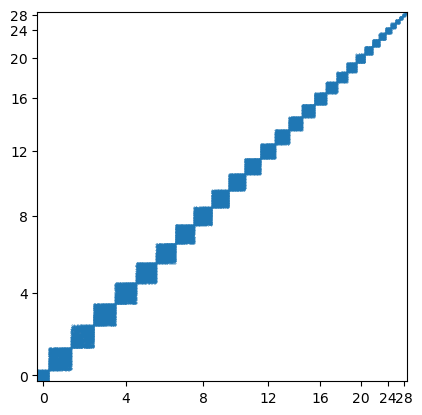

In [11]:
# Define RGT conditions
Nr = 295
Nd = 19

# Build and solve system
collinear = Range(l_max, Nr, Nd, I, rho, 1, 1)
collinear.set_observation_error(mwi, acc)
collinear.solve()

# Plot full normal matrix
plt.spy(collinear.get_N(), marker='o', markersize=0.3)  # this might crash for high L values
format_ax(4)

plt.show()

Now, a case with overlapping is shown, i.e., $L > N_r/2$. It results in a kite matrix structure.

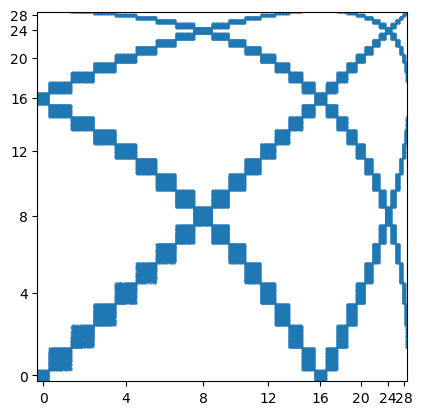

In [12]:
# Define RGT conditions
Nr = 16
Nd = 1

# Build and solve system
collinear = Range(l_max, Nr, Nd, I, rho, 1, 1)
collinear.set_observation_error(mwi, acc)
collinear.solve()

# Plot full normal matrix
plt.spy(collinear.get_N(), marker='o', markersize=0.3)  # this might crash for high L values
format_ax(4)

plt.show()